In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
# Data for the two departments
dept_A = np.array([12.5, 13.0, 11.8, 12.1, 13.4, 12.9, 13.2, 11.9, 12.6, 13.3, 12.0,
                   12.4, 13.1, 12.2, 12.7, 13.0, 12.8, 11.7, 12.3, 13.5, 12.5, 13.1,
                   12.6, 11.9, 13.2])

dept_B = np.array([14.2, 14.8, 15.0, 13.9, 14.5, 14.7, 14.0, 13.8, 14.4, 14.9, 15.2,
                   13.7, 14.3, 14.6, 15.1, 14.1, 14.8, 15.0, 14.2, 14.6, 14.3, 14.7,
                   15.0, 14.4, 14.1])


In [4]:
# 1. Descriptive Statistics
def descriptive_stats(data):
    mean = np.mean(data)
    var = np.var(data, ddof=1)
    std = np.sqrt(var)
    return mean, var, std

mean_A, var_A, std_A = descriptive_stats(dept_A)
mean_B, var_B, std_B = descriptive_stats(dept_B)

print("1. Descriptive Statistics")
print(f"Dept A - Mean: {mean_A:.2f}, Variance: {var_A:.4f}, Std Dev: {std_A:.4f}")
print(f"Dept B - Mean: {mean_B:.2f}, Variance: {var_B:.4f}, Std Dev: {std_B:.4f}")

print("\nComment:")
if std_A < std_B:
    print("Dept A shows greater consistency (lower standard deviation).")
else:
    print("Dept B shows greater consistency (lower standard deviation).")


1. Descriptive Statistics
Dept A - Mean: 12.63, Variance: 0.2896, Std Dev: 0.5381
Dept B - Mean: 14.49, Variance: 0.1824, Std Dev: 0.4271

Comment:
Dept B shows greater consistency (lower standard deviation).


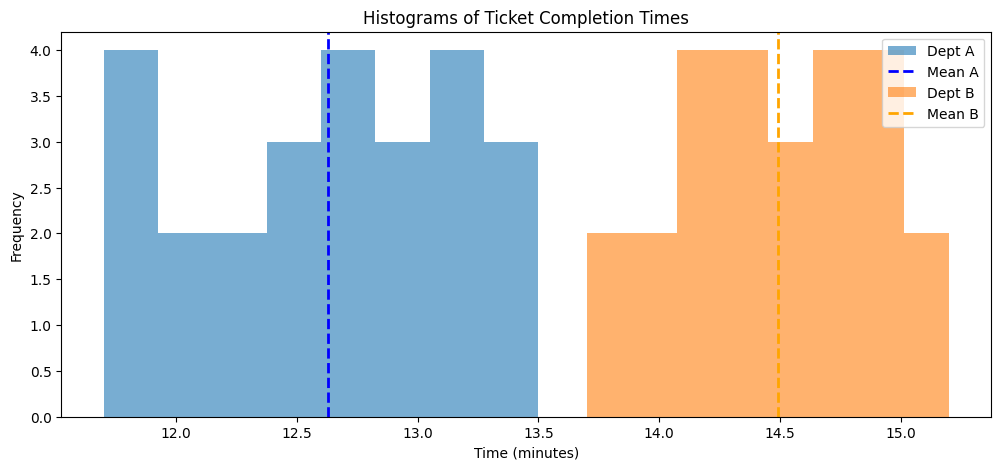


Comment on distribution and performance:
- Dept A has generally lower times, with a roughly symmetric distribution.
- Dept B times are higher, also roughly symmetric.
- Dept A appears faster on average, Dept B slower, consistent with means.


In [5]:
# 2. Data Visualization: Histograms with mean lines
plt.figure(figsize=(12,5))
plt.hist(dept_A, bins=8, alpha=0.6, label='Dept A')
plt.axvline(mean_A, color='blue', linestyle='dashed', linewidth=2, label='Mean A')
plt.hist(dept_B, bins=8, alpha=0.6, label='Dept B')
plt.axvline(mean_B, color='orange', linestyle='dashed', linewidth=2, label='Mean B')
plt.title('Histograms of Ticket Completion Times')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("\nComment on distribution and performance:")
print("- Dept A has generally lower times, with a roughly symmetric distribution.")
print("- Dept B times are higher, also roughly symmetric.")
print("- Dept A appears faster on average, Dept B slower, consistent with means.")


In [6]:
# 3. Monte Carlo Simulation
np.random.seed(123)
sim_times_A = np.random.normal(mean_A, std_A, 100000)

# Estimate P(Time < 12) for Dept A
prob_time_less_12 = np.mean(sim_times_A < 12)
print(f"\n3. Monte Carlo Simulation:")
print(f"Estimated P(Time < 12) for Dept A: {prob_time_less_12:.4f}")



3. Monte Carlo Simulation:
Estimated P(Time < 12) for Dept A: 0.1214



4. Hypothesis Testing (Pooled t-test):
Pooled Variance: 0.2360
t-statistic: -13.5653
Degrees of freedom: 48
p-value: 0.0000
Reject H0: Significant difference between departments' mean completion times.


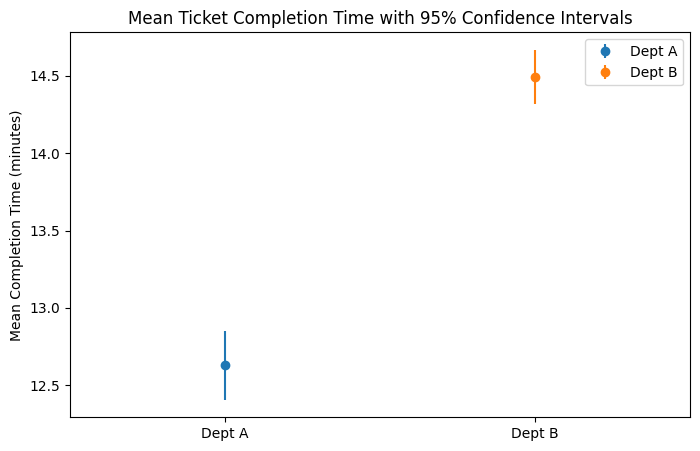

In [7]:
# 4. Hypothesis Testing (Pooled t-test)
n_A = len(dept_A)
n_B = len(dept_B)

# Null hypothesis H0: mean_A = mean_B
# Alternative hypothesis Ha: mean_A != mean_B

# Calculate pooled variance
s_p2 = ((n_A - 1)*var_A + (n_B - 1)*var_B) / (n_A + n_B - 2)

# Calculate t-statistic
t_stat = (mean_A - mean_B) / np.sqrt(s_p2 * (1/n_A + 1/n_B))

# Degrees of freedom
df = n_A + n_B - 2

# Two-tailed p-value
p_value = 2 * stats.t.sf(np.abs(t_stat), df)

print("\n4. Hypothesis Testing (Pooled t-test):")
print(f"Pooled Variance: {s_p2:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"Degrees of freedom: {df}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject H0: Significant difference between departments' mean completion times.")
else:
    print("Fail to reject H0: No significant difference detected.")

# 95% Confidence Intervals
def conf_interval(mean, std, n):
    se = std / np.sqrt(n)
    margin = stats.t.ppf(1 - alpha/2, n - 1) * se
    return mean - margin, mean + margin

ci_A = conf_interval(mean_A, std_A, n_A)
ci_B = conf_interval(mean_B, std_B, n_B)

# Plot means with 95% CI
plt.figure(figsize=(8,5))
plt.errorbar(1, mean_A, yerr=[[mean_A - ci_A[0]], [ci_A[1] - mean_A]], fmt='o', label='Dept A')
plt.errorbar(2, mean_B, yerr=[[mean_B - ci_B[0]], [ci_B[1] - mean_B]], fmt='o', label='Dept B')
plt.xlim(0.5, 2.5)
plt.xticks([1, 2], ['Dept A', 'Dept B'])
plt.ylabel('Mean Completion Time (minutes)')
plt.title('Mean Ticket Completion Time with 95% Confidence Intervals')
plt.legend()
plt.show()

In [9]:
# 5. Unique Personalization
# Replace with last digit of your Student_ID
student_id_last_digit = 0  # example
adjust_val = student_id_last_digit % 4

dept_B_personalized = dept_B + adjust_val

mean_B_p, var_B_p, std_B_p = descriptive_stats(dept_B_personalized)

# Recalculate pooled variance and t-statistic with personalized Dept B
s_p2_p = ((n_A - 1)*var_A + (n_B - 1)*var_B_p) / (n_A + n_B - 2)
t_stat_p = (mean_A - mean_B_p) / np.sqrt(s_p2_p * (1/n_A + 1/n_B))
p_value_p = 2 * stats.t.sf(np.abs(t_stat_p), df)

print(f"\n5. Personalized Data Hypothesis Test (adjust value = {adjust_val}):")
print(f"New Dept B Mean: {mean_B_p:.4f}")
print(f"New pooled variance: {s_p2_p:.4f}")
print(f"New t-statistic: {t_stat_p:.4f}")
print(f"New p-value: {p_value_p:.4f}")

if p_value_p < alpha:
    print("Reject H0: Significant difference remains with personalized data.")
else:
    print("Fail to reject H0: No significant difference with personalized data.")

print("\nExplanation:")
print("Adding a small constant shifts Dept B's mean, potentially affecting the test statistic.")
print("However, since the adjustment is small and sample sizes are unchanged,")
print("the overall conclusion may or may not change depending on the magnitude of adjustment.")


5. Personalized Data Hypothesis Test (adjust value = 0):
New Dept B Mean: 14.4920
New pooled variance: 0.2360
New t-statistic: -13.5653
New p-value: 0.0000
Reject H0: Significant difference remains with personalized data.

Explanation:
Adding a small constant shifts Dept B's mean, potentially affecting the test statistic.
However, since the adjustment is small and sample sizes are unchanged,
the overall conclusion may or may not change depending on the magnitude of adjustment.
